# Dashboard and Visualizations
## Driver-Route Matching Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

## 1. Load Results

In [2]:
# Load all datasets
drivers_df = pd.read_csv('../data/scored_drivers.csv')
routes_df = pd.read_csv('../data/scored_routes.csv')
assignments_df = pd.read_csv('../outputs/driver_route_assignment.csv')

print(f'Drivers: {len(drivers_df)}')
print(f'Routes: {len(routes_df)}')
print(f'Assignments: {len(assignments_df)}')
assignments_df.head()

Drivers: 350
Routes: 150
Assignments: 150


,driver_id,route_id,driver_score,route_score,match_score,score_difference,km_balance,driver_safety,driver_efficiency,route_difficulty,route_distance_km,route_peligrosity
0,DRV00124,RTE0066,55.05,41.82,98.91569,13.23,-2145.69,64.48,28.44,Medium,626.73,29.83
1,DRV00130,RTE0116,67.33,41.49,96.34469,25.84,-12184.69,60.11,77.21,Medium,374.91,35.57
2,DRV00312,RTE0031,62.89,40.12,95.46269,22.77,-8232.69,66.12,47.42,Medium,281.67,26.09
3,DRV00146,RTE0129,65.78,40.47,95.26969,25.31,-10579.69,62.81,65.45,Medium,684.01,47.48
4,DRV00237,RTE0063,70.57,43.28,93.78969,27.29,-11079.69,67.69,70.18,Medium,276.18,42.51


## 2. Score Distributions

In [3]:
# Driver score distributions
fig = make_subplots(rows=1, cols=2, subplot_titles=('Driver Scores', 'Route Scores'))

fig.add_trace(go.Histogram(x=drivers_df['driver_score_adjusted'], name='Driver Score', marker_color='blue', opacity=0.7), row=1, col=1)
fig.add_trace(go.Histogram(x=routes_df['route_score_final'], name='Route Score', marker_color='red', opacity=0.7), row=1, col=2)

fig.update_layout(height=400, showlegend=False, title_text='Score Distributions')
fig.show()

In [4]:
# Match quality scatter plot
fig = px.scatter(assignments_df, x='driver_score', y='route_score', 
                 color='match_score', size='route_distance_km',
                 hover_data=['driver_id', 'route_id', 'route_difficulty'],
                 title='Driver-Route Match Quality',
                 labels={'driver_score': 'Driver Score', 'route_score': 'Route Score'},
                 color_continuous_scale='Viridis')
fig.add_shape(type='line', x0=0, y0=0, x1=100, y1=100, line=dict(color='red', dash='dash'))
fig.update_layout(height=600)
fig.show()

## 3. Assignment Analysis

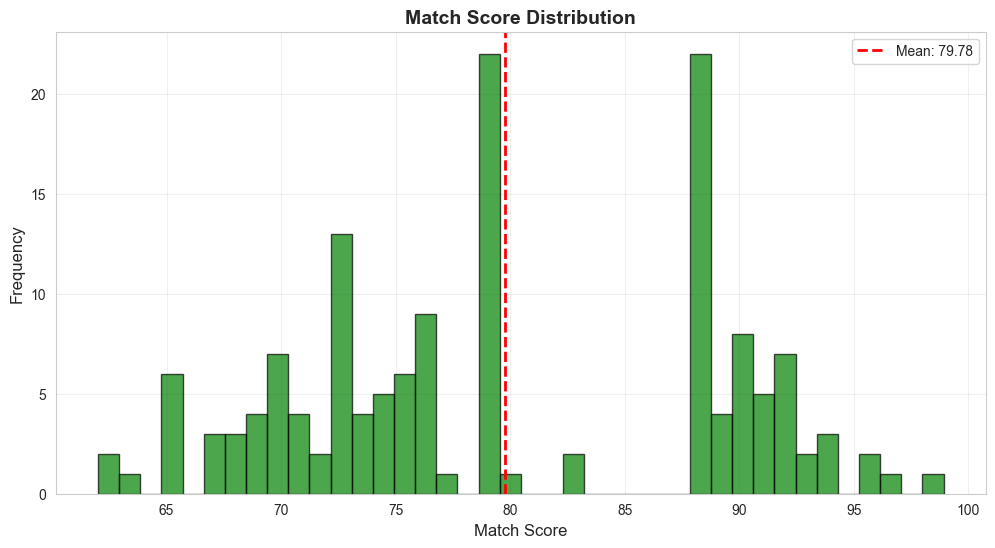

In [5]:
# Match score distribution
plt.figure(figsize=(12, 6))
plt.hist(assignments_df['match_score'], bins=40, color='green', alpha=0.7, edgecolor='black')
plt.axvline(assignments_df['match_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {assignments_df["match_score"].mean():.2f}')
plt.xlabel('Match Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Match Score Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

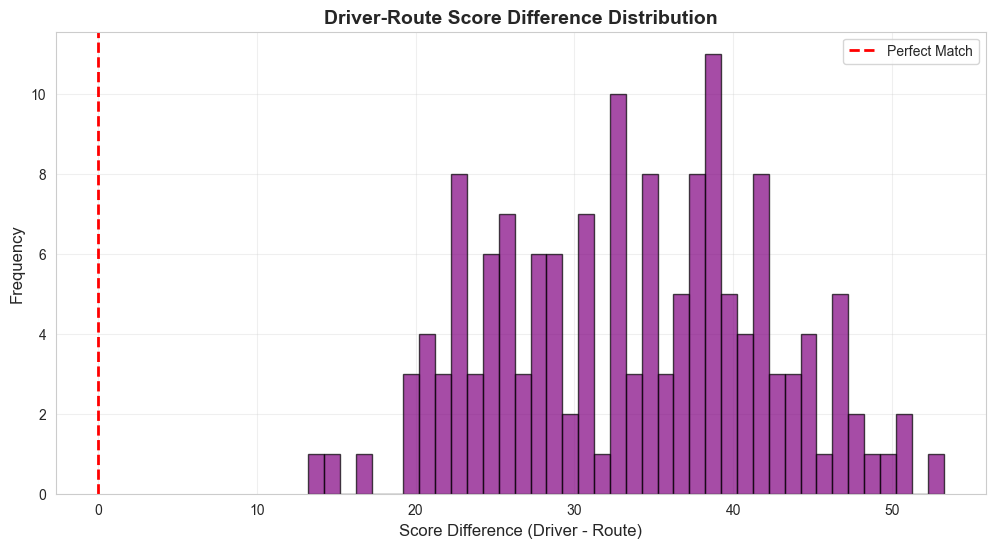

Mean score difference: 33.64
Std score difference: 8.50


In [6]:
# Score difference analysis
plt.figure(figsize=(12, 6))
plt.hist(assignments_df['score_difference'], bins=40, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Perfect Match')
plt.xlabel('Score Difference (Driver - Route)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Driver-Route Score Difference Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'Mean score difference: {assignments_df["score_difference"].mean():.2f}')
print(f'Std score difference: {assignments_df["score_difference"].std():.2f}')

In [7]:
# Assignments by route difficulty
difficulty_counts = assignments_df['route_difficulty'].value_counts()

fig = go.Figure(data=[go.Pie(labels=difficulty_counts.index, values=difficulty_counts.values, hole=0.3)])
fig.update_layout(title='Assignments by Route Difficulty', height=500)
fig.show()

## 4. Geographic Visualization (Mock)

In [8]:
# Generate mock coordinates for routes (Argentina)
np.random.seed(42)
routes_df['lat'] = np.random.uniform(-40, -25, len(routes_df))
routes_df['lon'] = np.random.uniform(-68, -55, len(routes_df))

# Merge with assignments
assignments_with_coords = assignments_df.merge(routes_df[['route_id', 'lat', 'lon']], on='route_id')

# Create map
fig = px.scatter_mapbox(assignments_with_coords, 
                        lat='lat', lon='lon',
                        color='route_difficulty',
                        size='route_distance_km',
                        hover_data=['route_id', 'driver_id', 'match_score'],
                        title='Route Assignments Map (Argentina)',
                        mapbox_style='open-street-map',
                        zoom=4)
fig.update_layout(height=700)
fig.show()

## 5. Top Performers

In [9]:
# Top 10 best matches
print('=== TOP 10 BEST MATCHES ===')
top_matches = assignments_df.nlargest(10, 'match_score')[['driver_id', 'route_id', 'match_score', 'driver_score', 'route_score', 'route_difficulty']]
top_matches

=== TOP 10 BEST MATCHES ===


,driver_id,route_id,match_score,driver_score,route_score,route_difficulty
0,DRV00124,RTE0066,98.91569,55.05,41.82,Medium
1,DRV00130,RTE0116,96.34469,67.33,41.49,Medium
2,DRV00312,RTE0031,95.46269,62.89,40.12,Medium
3,DRV00146,RTE0129,95.26969,65.78,40.47,Medium
4,DRV00237,RTE0063,93.78969,70.57,43.28,Medium
5,DRV00236,RTE0117,93.67569,65.72,43.27,Medium
6,DRV00304,RTE0105,93.60669,66.48,52.02,Medium
7,DRV00155,RTE0111,92.62069,75.75,50.60,Medium
8,DRV00230,RTE0057,92.47269,62.93,41.84,Medium
9,DRV00080,RTE0017,92.40169,73.44,42.64,Medium


In [10]:
# Top 10 drivers
print('=== TOP 10 DRIVERS ===')
top_drivers = drivers_df.nlargest(10, 'driver_score_adjusted')[['driver_id', 'driver_score_adjusted', 'safety_score', 'efficiency_score', 'compliance_score']]
top_drivers

=== TOP 10 DRIVERS ===


,driver_id,driver_score_adjusted,safety_score,efficiency_score,compliance_score
133,DRV00134,88.04,95.07,76.64,88.23
249,DRV00250,87.63,82.90,90.40,89.09
182,DRV00183,87.25,85.72,85.96,90.65
60,DRV00061,86.95,94.93,78.95,86.34
298,DRV00299,86.72,88.36,86.92,84.47
268,DRV00269,86.51,83.52,86.04,90.12
323,DRV00324,85.87,91.24,90.64,69.72
8,DRV00009,85.83,90.17,78.97,87.76
88,DRV00089,85.63,86.10,84.07,85.22
127,DRV00128,85.36,88.46,82.77,86.54


## 6. Summary Statistics

In [11]:
print('=== MATCHING SUMMARY ===')
print(f'Total drivers: {len(drivers_df)}')
print(f'Total routes: {len(routes_df)}')
print(f'Successful assignments: {len(assignments_df)}')
print(f'Unassigned drivers: {len(drivers_df) - len(assignments_df)}')
print(f'\nAverage match score: {assignments_df["match_score"].mean():.2f}')
print(f'Average driver score: {drivers_df["driver_score_adjusted"].mean():.2f}')
print(f'Average route score: {routes_df["route_score_final"].mean():.2f}')
print(f'\nWell-matched assignments (|diff| < 10): {(assignments_df["score_difference"].abs() < 10).sum()} ({(assignments_df["score_difference"].abs() < 10).sum()/len(assignments_df)*100:.1f}%)')

=== MATCHING SUMMARY ===
Total drivers: 350
Total routes: 150
Successful assignments: 150
Unassigned drivers: 200

Average match score: 79.78
Average driver score: 76.00
Average route score: 38.64

Well-matched assignments (|diff| < 10): 0 (0.0%)
